<a href="https://colab.research.google.com/github/VictorPonce27/ACT3.2/blob/master/Copy_of_SentimentAnalysis_SVM70_30.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Librerías necesarias

In [6]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
#import tensorflow as tf
import time
from sklearn import svm
from sklearn.metrics import classification_report
import tensorflow as tf
from keras.utils import pad_sequences
from keras.preprocessing.text import Tokenizer
import matplotlib.pyplot as plt

# Cargando el conjunto de datos

In [7]:
from google.colab import drive

drive.mount("/content/gdrive")  
!pwd  # show current path 

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/Shareddrives/Compiladores/Data


In [9]:
%cd "/content/gdrive/Shareddrives/Compiladores/Data"
!ls  # show current directory

/content/gdrive/Shareddrives/Compiladores/Data
'IMDB Dataset.csv'   model.pk1	 tokenizer.pkl	  vectorizer.pkl
 LSTM.pkl	     model.pkl	 vectorizer.pk1


In [10]:
data = pd.read_csv('IMDB Dataset.csv')

In [11]:
dataTemp = pd.DataFrame(data)

# Exploración de datos

In [ ]:
#data.head(15)
#data = data.head(4500)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [ ]:
data.isnull().sum()

review       0
sentiment    0
dtype: int64

**Observaciones:**
* Nuestro dataframe cuenta con dos columnas de tipo objeto y 5000 entradas.
* Nuestro dataframe no presenta datos nulos.
* En nuestra columna de review podemos observar caracteres que forman parte de sintaxis HTML los cuales tendrán que ser removidos de los textos, ya que no aportan información relevante para el análisis, al igual que los links porque estos redirigen a información adicional que no es requisito para este enfoque.


In [12]:
sentiment = data['sentiment']
review = data['review']

In [ ]:
sentiment.describe()

count        50000
unique           2
top       positive
freq         25000
Name: sentiment, dtype: object

Observaciones:
* nuestra columna sentiment solo cuenta con dos tipos de sentimientos positive y negative

In [13]:
review.describe()

count                                                 50000
unique                                                49582
top       Loved today's show!!! It was a variety and not...
freq                                                      5
Name: review, dtype: object

Remove the HTML element that is on the review and simplify the tags

In [14]:
def transformSentiment(sentiment):
  if sentiment=="positive":
    return "pos"
  return "neg"

def transformReview(review):
  return review.replace("<br />","")

In [15]:
sentiment = sentiment.map(transformSentiment)

In [16]:
review = review.map(transformReview)

Here we can see the review without the br element 

In [ ]:
review.head(10)

0    One of the other reviewers has mentioned that ...
1    A wonderful little production. The filming tec...
2    I thought this was a wonderful way to spend ti...
3    Basically there's a family where a little boy ...
4    Petter Mattei's "Love in the Time of Money" is...
5    Probably my all-time favorite movie, a story o...
6    I sure would like to see a resurrection of a u...
7    This show was an amazing, fresh & innovative i...
8    Encouraged by the positive comments about this...
9    If you like original gut wrenching laughter yo...
Name: review, dtype: object

In [17]:
review.describe()

count                                                 50000
unique                                                49581
top       Loved today's show!!! It was a variety and not...
freq                                                      5
Name: review, dtype: object

In [ ]:
#sentiment.plot.hist()

In [18]:
data['sentiment'] = sentiment
data['review']= review

Split the dataset in train and test, at the moment we divided 80% for test and 20% for training, the reason is that the SVM takes a lot of time, so by doing this we reduce the training time and the results are still good.

In [19]:
X_train, X_test, y_train, y_test = train_test_split(review, sentiment, test_size=0.2, random_state=42)

In [ ]:
#train_dataset = from_tensor_slices((X_train, y_train))
#test_dataset = from_tensor_slices((X_test, y_test))

In [20]:
X_train.describe()

count                                                 40000
unique                                                39743
top       Loved today's show!!! It was a variety and not...
freq                                                      4
Name: review, dtype: object

Use the vectorizer to process the reviews

In [21]:

vectorizer = TfidfVectorizer()
train_vectors = vectorizer.fit_transform(X_train)
test_vectors = vectorizer.transform(X_test)

Create and train the SVM with a linear kernel, at the end get the report of the model and how it recognizes positive and negative emotions.

In [ ]:

classifier_linear = svm.SVC(kernel='linear')
classifier_linear.fit(train_vectors, y_train)
prediction_linear = classifier_linear.predict(test_vectors)
report = classification_report(y_test, prediction_linear, output_dict=True)
print('positive: ', report['pos'])
print('negative: ', report['neg'])


Test with a review

In [ ]:
print("result", report['accuracy'])

In [ ]:
review_vector = vectorizer.transform(["The movie was long and that made it difficult to digest but actors were great, i hated that i loved it"]) # vectorizing
print(classifier_linear.predict(review_vector))

NameError: ignored

In [ ]:
import joblib

## Saving the model for future uses

This lines of code saves the model to use it in the future without a new training.
Also we need to save the vectorizer

Save the model

In [ ]:
#joblib.dump(classifier_linear,'model.pkl')
#joblib.dump(vectorizer, 'vectorizer.pkl')

## Running the model without training again

Just load the saved models and enter your text for a new prediction
Remember to connect to google drive with te code block that is at the beggining

In [ ]:
!ls

'IMDB Dataset.csv'   model.pk1	 model.pkl   vectorizer.pk1   vectorizer.pkl


Here we load the classifier and the vectorizer to use them without training the model again

In [ ]:
classifier_linear = joblib.load('model.pkl')
vectorizer = joblib.load('vectorizer.pkl')

NameError: ignored

Here we can test any review we want

In [ ]:
#review_vector = vectorizer.transform(["I loved the movie"]) 
#review_vector = vectorizer.transform(["""Up until today, I haven't bothered to review "The Godfather". After all, everyone pretty much knows it's one of the greatest films ever made. It's #2 on IMDb's Top 100. It won the Best Picture Oscar. And, there are nearly 1600 reviews on IMDb. So what's one more review?! Well, after completing 14,000 reviews (because I am nuts), I guess it's time I got around to reviewing a film I should have reviewed a long time ago. So, here goes....the film is perfect and only a dope wouldn't watch it. Unfortunately, IMDb requires me to say more to meet it's 10 line minimum for reviews. So, I'll point out that you do NOT need to like gangster films to enjoy this film. Yes, it's violent and nasty in spots--but it's also brilliantly written and produced from start to finish and deserves the accolades it's received.

# My advice is that instead of just watching "The Godfather" and "The Godfather: Part II", see the combined version they created for television--with additional scenes that made it a very rich experience."""]) 
review_vector = vectorizer.transform(["I didn't like how much i enjoy it"]) 

print(classifier_linear.predict(review_vector))

['pos']


Up until today, I haven't bothered to review "The Godfather". After all, everyone pretty much knows it's one of the greatest films ever made. It's #2 on IMDb's Top 100. It won the Best Picture Oscar. And, there are nearly 1600 reviews on IMDb. So what's one more review?! Well, after completing 14,000 reviews (because I am nuts), I guess it's time I got around to reviewing a film I should have reviewed a long time ago. So, here goes....the film is perfect and only a dope wouldn't watch it. Unfortunately, IMDb requires me to say more to meet it's 10 line minimum for reviews. So, I'll point out that you do NOT need to like gangster films to enjoy this film. Yes, it's violent and nasty in spots--but it's also brilliantly written and produced from start to finish and deserves the accolades it's received.

My advice is that instead of just watching "The Godfather" and "The Godfather: Part II", see the combined version they created for television--with additional scenes that made it a very rich experience.

# Neural network

In [ ]:
# # Create a copy of the df to implement in the neural network

dfEncoded = pd.DataFrame(data)

dataTemp['sentiment'].mask(dataTemp['sentiment'] == 'positive', 1, inplace=True)
dataTemp['sentiment'].mask(dataTemp['sentiment'] == 'negative', 0, inplace=True)

sentiment = dataTemp['sentiment']  # Target variable



In [ ]:

# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 50000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 250
# This is fixed.
EMBEDDING_DIM = 100

In [ ]:
# Tokenize the text
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(dfEncoded['review'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 126566 unique tokens.


In [ ]:
# Convert text to sequences
sequences = tokenizer.texts_to_sequences(dfEncoded['review'].values)
# Pad sequences
X = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (50000, 250)


In [ ]:
# Convert categorical labels to numbers
Y = pd.get_dummies(dataTemp['sentiment']).values
print('Shape of label tensor:', Y.shape)

Shape of label tensor: (50000, 2)


In [ ]:
# Train test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(35000, 250) (35000, 2)
(15000, 250) (15000, 2)


In [ ]:
# Define LSTM model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]),
    tf.keras.layers.SpatialDropout1D(0.2),
    tf.keras.layers.LSTM(100, dropout=0.2, recurrent_dropout=0.2),
    tf.keras.layers.Dense(2, activation='softmax')
])

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 250, 100)          5000000   
                                                                 
 spatial_dropout1d (SpatialD  (None, 250, 100)         0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 2)                 202       
                                                                 
Total params: 5,080,602
Trainable params: 5,080,602
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
# Train the model
epochs = 5
batch_size = 64

In [ ]:
history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, validation_split=0.1)


Epoch 1/5
493/493 [==============================] - 664s 1s/step - loss: 0.3958 - accuracy: 0.8156 - val_loss: 0.2859 - val_accuracy: 0.8883
Epoch 2/5
493/493 [==============================] - 589s 1s/step - loss: 0.1994 - accuracy: 0.9249 - val_loss: 0.2965 - val_accuracy: 0.8857
Epoch 3/5
493/493 [==============================] - 565s 1s/step - loss: 0.1237 - accuracy: 0.9564 - val_loss: 0.3495 - val_accuracy: 0.8669
Epoch 4/5
493/493 [==============================] - 558s 1s/step - loss: 0.0873 - accuracy: 0.9700 - val_loss: 0.3719 - val_accuracy: 0.8754
Epoch 5/5
493/493 [==============================] - 557s 1s/step - loss: 0.0658 - accuracy: 0.9773 - val_loss: 0.4079 - val_accuracy: 0.8769


In [ ]:
# Validate the model
loss, accuracy = model.evaluate(X_train, Y_train)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(loss, accuracy))

1250/1250 [==============================] - 81s 65ms/step - loss: 0.0798 - accuracy: 0.9778
Test set
  Loss: 0.080
  Accuracy: 0.978


In [ ]:
# Validate the model
loss, accuracy = model.evaluate(X_test, Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(loss, accuracy))

313/313 [==============================] - 21s 67ms/step - loss: 0.4427 - accuracy: 0.8859
Test set
  Loss: 0.443
  Accuracy: 0.886


# Guardar el modelo

In [ ]:
# joblib.dump(history,'LSTM.pkl')
# joblib.dump(tokenizer, 'tokenizer.pkl')

['tokenizer.pkl']

# Prueba manual

In [ ]:
# Texto de prueba
texto = "I didn't like how much i enjoy it"

# Tokenizar el texto
texto_seq = tokenizer.texts_to_sequences([texto])
# Aplicar padding
texto_padded = pad_sequences(texto_seq, maxlen=MAX_SEQUENCE_LENGTH)

In [ ]:
# Realizar la predicción
prediccion = model.predict(texto_padded)

1/1 [==============================] - 0s 85ms/step


In [ ]:
# Obtener la clase predicha
clase_predicha = np.argmax(prediccion)

In [ ]:
clase_predicha

1

# Gráficas

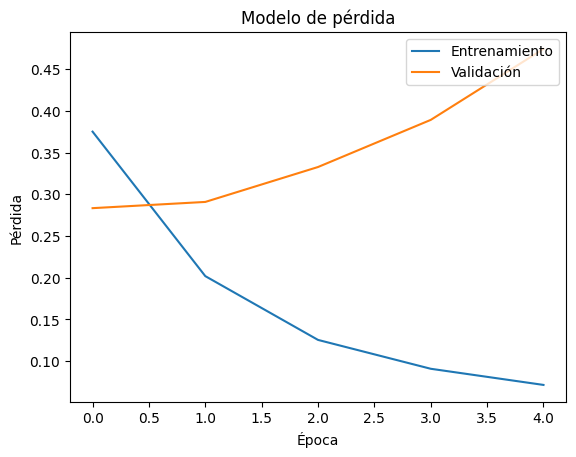

In [ ]:
# Gráfica de pérdida
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Modelo de pérdida')
plt.ylabel('Pérdida')
plt.xlabel('Época')
plt.legend(['Entrenamiento', 'Validación'], loc='upper right')
plt.show()

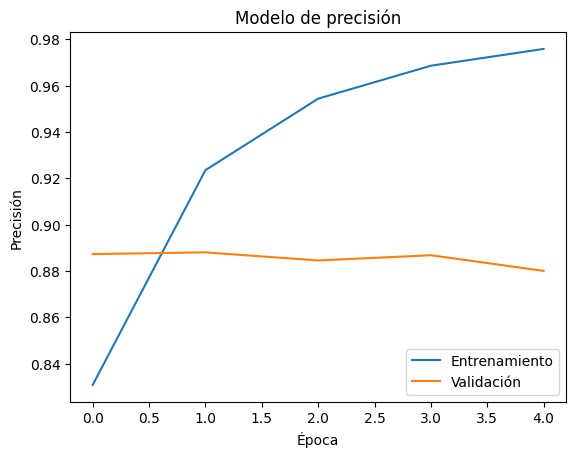

In [ ]:
# Gráfica de precisión
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Modelo de precisión')
plt.ylabel('Precisión')
plt.xlabel('Época')
plt.legend(['Entrenamiento', 'Validación'], loc='lower right')
plt.show()